# California Housing Price Prediction: Exploratory Data Analysis and Model Training

This notebook performs a comprehensive analysis of the California Housing dataset to build a predictive model for housing prices. We'll cover:

1. Loading and exploring the dataset
2. Data visualization and preprocessing
3. Feature engineering and scaling
4. Training multiple regression models
5. Hyperparameter tuning
6. Model evaluation and selection
7. Visualizing predictions

The California Housing dataset contains housing data collected from the 1990 California census, including features like median income, house age, average rooms, location coordinates, and the target variable: median house value (in $100,000s).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import joblib
import urllib.error
import sys

# Set plot styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
## 1. Data Loading and Initial Exploration

# Import necessary libraries for data analysis, visualization, and machine learning
# Load California Housing dataset from scikit-learn
# Create a DataFrame with features and target variable
# Display basic information about the dataset

housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target

In [5]:
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
# Check for missing values in the dataset
# Fortunately, this dataset doesn't have any missing values


print(data.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [8]:
print(data.dtypes)

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object


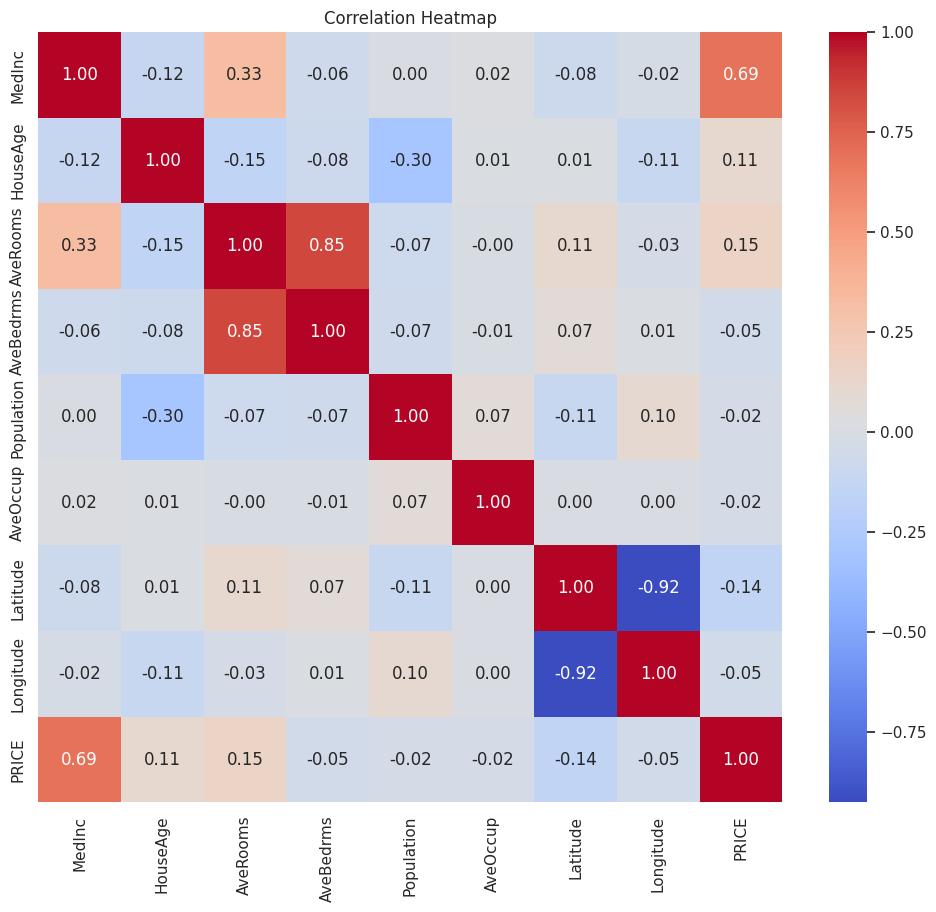

In [10]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [11]:
data_engineered = data.copy()

In [12]:
# Create new features that might be useful for prediction:
# - Rooms per person (measure of living space)
# - Bedroom ratio (proportion of bedrooms to total rooms)
# - Population density (population relative to occupancy)

data_engineered['ROOMS_PER_HOUSEHOLD'] = data_engineered['AveRooms'] / data_engineered['AveOccup']
data_engineered['BEDROOM_RATIO'] = data_engineered['AveBedrms'] / data_engineered['AveRooms']
data_engineered['POPULATION_DENSITY'] = data_engineered['Population'] / data_engineered['AveOccup']

data_engineered.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE,ROOMS_PER_HOUSEHOLD,BEDROOM_RATIO,POPULATION_DENSITY
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,126.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,1138.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,177.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,219.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096,259.0


In [13]:
new_features = ['ROOMS_PER_HOUSEHOLD', 'BEDROOM_RATIO', 'POPULATION_DENSITY']
for feature in new_features:
    correlation = data_engineered[feature].corr(data_engineered['PRICE'])
    print(f"Correlation between {feature} and PRICE: {correlation:.4f}")

Correlation between ROOMS_PER_HOUSEHOLD and PRICE: 0.2095
Correlation between BEDROOM_RATIO and PRICE: -0.2556
Correlation between POPULATION_DENSITY and PRICE: 0.0658


In [14]:
X = data_engineered.drop('PRICE', axis=1)
y = data_engineered['PRICE']

In [15]:
# Split data into features (X) and target (y)
# Then further split into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()

In [18]:
# Standardize features to have mean=0 and std=1
# This ensures all features contribute equally to the model

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,ROOMS_PER_HOUSEHOLD,BEDROOM_RATIO,POPULATION_DENSITY
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-6.519333e-17,-9.251859e-18,-1.981081e-16,-1.707291e-16,-2.151595e-19,4.936566e-17,6.400995e-17,1.753335e-15,1.527632e-17,-5.927644e-17,-5.163828e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.775438e+00,-2.190766e+00,-1.904386e+00,-1.762117e+00,-1.251913e+00,-2.076846e-01,-1.447697e+00,-2.377207e+00,-1.757030e+00,-1.946041e+00,-1.309827e+00
25%,-6.900689e-01,-8.417859e-01,-4.118373e-01,-2.081645e-01,-5.606339e-01,-5.770769e-02,-8.018107e-01,-1.110749e+00,-4.035763e-01,-6.497310e-01,-5.774595e-01
50%,-1.758995e-01,3.108328e-02,-8.350905e-02,-1.094160e-01,-2.281865e-01,-2.415892e-02,-6.473597e-01,5.346501e-01,-3.467976e-02,-1.733004e-01,-2.362132e-01
75%,4.686502e-01,6.658972e-01,2.621376e-01,8.455177e-03,2.634487e-01,1.580865e-02,9.720351e-01,7.839530e-01,2.842758e-01,4.594195e-01,2.782814e-01
max,5.839268e+00,1.856173e+00,5.716655e+01,5.664727e+01,3.012743e+01,1.071164e+02,2.951816e+00,2.628794e+00,4.446037e+01,1.357290e+01,1.465263e+01


In [22]:
X_train_scaled_df.to_csv('X_train_scaled.csv', index=False)
X_test_scaled_df.to_csv('X_test_scaled.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)

# Save the original data
data.to_csv('california_housing.csv', index=False)

# Save the scaler for later use
joblib.dump(scaler, 'scaler.pkl')

print("\nData preprocessing complete. Files saved to the data directory.")

# 8. Summary of Data Preprocessing
print("""
Key findings:
- The dataset contains no missing values, which simplified our preprocessing
- MedInc (median income) and AveOccup (average occupancy) show high correlation with house prices
- We engineered 3 new features that provide additional insights
- The data has been standardized for model training
""")


Data preprocessing complete. Files saved to the data directory.

Summary of Data Preprocessing:
1. Loaded the California Housing dataset
2. Performed exploratory data analysis
3. Analyzed feature distributions and correlations
4. Created new engineered features
5. Scaled the data for model training
6. Saved the processed datasets

Key findings:
- The dataset contains no missing values, which simplified our preprocessing
- MedInc (median income) and AveOccup (average occupancy) show high correlation with house prices
- We engineered 3 new features that provide additional insights
- The data has been standardized for model training



In [40]:
## Model Training

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import joblib
import time

In [28]:
# Define a function to evaluate models using multiple metrics:
# - MSE (Mean Squared Error): Average of squared differences between predictions and actual values
# - RMSE (Root Mean Squared Error): Square root of MSE, in the same units as the target variable
# - MAE (Mean Absolute Error): Average of absolute differences between predictions and actual values
# - R² (R-squared): Proportion of variance in the target that is predictable from features
# - Adjusted R²: R² adjusted for the number of predictors
# - Training time: How long it takes to train the model

# Initialize and train baseline models without hyperparameter tuning
# Store results for each model for later comparison

# Display performance metrics for each baseline model
# Lower values are better for error metrics (MSE, RMSE, MAE)
# Higher values are better for R² and Adjusted R² (max 1.0)


def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Evaluate a model and return performance metrics."""
    # Train the model
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    # Mean Squared Error
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Root Mean Squared Error
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # Mean Absolute Error
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # R-squared
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Adjusted R-squared
    n_train = len(y_train)
    p = X_train.shape[1]  # Number of predictors
    adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

    n_test = len(y_test)
    adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

    # Return results
    return {
        'mse_train': mse_train,
        'mse_test': mse_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'adj_r2_train': adj_r2_train,
        'adj_r2_test': adj_r2_test,
        'training_time': training_time
    }

In [29]:
print("\n2. Training baseline models...")
baseline_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}


2. Training baseline models...


In [34]:

results = []

for model_name, model in baseline_models.items():
    print(f"Training {model_name}...")
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        'Model': model_name,
        'MSE (Train)': metrics['mse_train'],
        'MSE (Test)': metrics['mse_test'],
        'RMSE (Train)': metrics['rmse_train'],
        'RMSE (Test)': metrics['rmse_test'],
        'MAE (Train)': metrics['mae_train'],
        'MAE (Test)': metrics['mae_test'],
        'R² (Train)': metrics['r2_train'],
        'R² (Test)': metrics['r2_test'],
        'Adj. R² (Train)': metrics['adj_r2_train'],
        'Adj. R² (Test)': metrics['adj_r2_test'],
        'Training Time (s)': metrics['training_time']
    })

    print(f"{model_name} - RMSE: {metrics['rmse_test']:.4f}, MAE: {metrics['mae_test']:.4f}, MSE: {metrics['mse_test']:.4f}, R²: {metrics['r2_test']:.4f}, Adj. R²: {metrics['adj_r2_test']:.4f}")

Training Linear Regression...
Linear Regression - RMSE: 0.6738, MAE: 0.4874, MSE: 0.4540, R²: 0.6535, Adj. R²: 0.6526
Training Ridge Regression...
Ridge Regression - RMSE: 0.6739, MAE: 0.4879, MSE: 0.4542, R²: 0.6534, Adj. R²: 0.6525
Training Lasso Regression...
Lasso Regression - RMSE: 0.9356, MAE: 0.7328, MSE: 0.8753, R²: 0.3320, Adj. R²: 0.3302
Training Decision Tree...
Decision Tree - RMSE: 0.7132, MAE: 0.4586, MSE: 0.5087, R²: 0.6118, Adj. R²: 0.6108
Training Random Forest...
Random Forest - RMSE: 0.5061, MAE: 0.3298, MSE: 0.2561, R²: 0.8045, Adj. R²: 0.8040
Training Gradient Boosting...
Gradient Boosting - RMSE: 0.5384, MAE: 0.3668, MSE: 0.2899, R²: 0.7788, Adj. R²: 0.7782
Training XGBoost...
XGBoost - RMSE: 0.4668, MAE: 0.3039, MSE: 0.2179, R²: 0.8337, Adj. R²: 0.8333


In [35]:
# Create results DataFrame and save
results_df = pd.DataFrame(results)
results_df.to_csv('baseline_models_results.csv', index=False)
print("\nBaseline models results saved to baseline_models_results.csv")


Baseline models results saved to baseline_models_results.csv


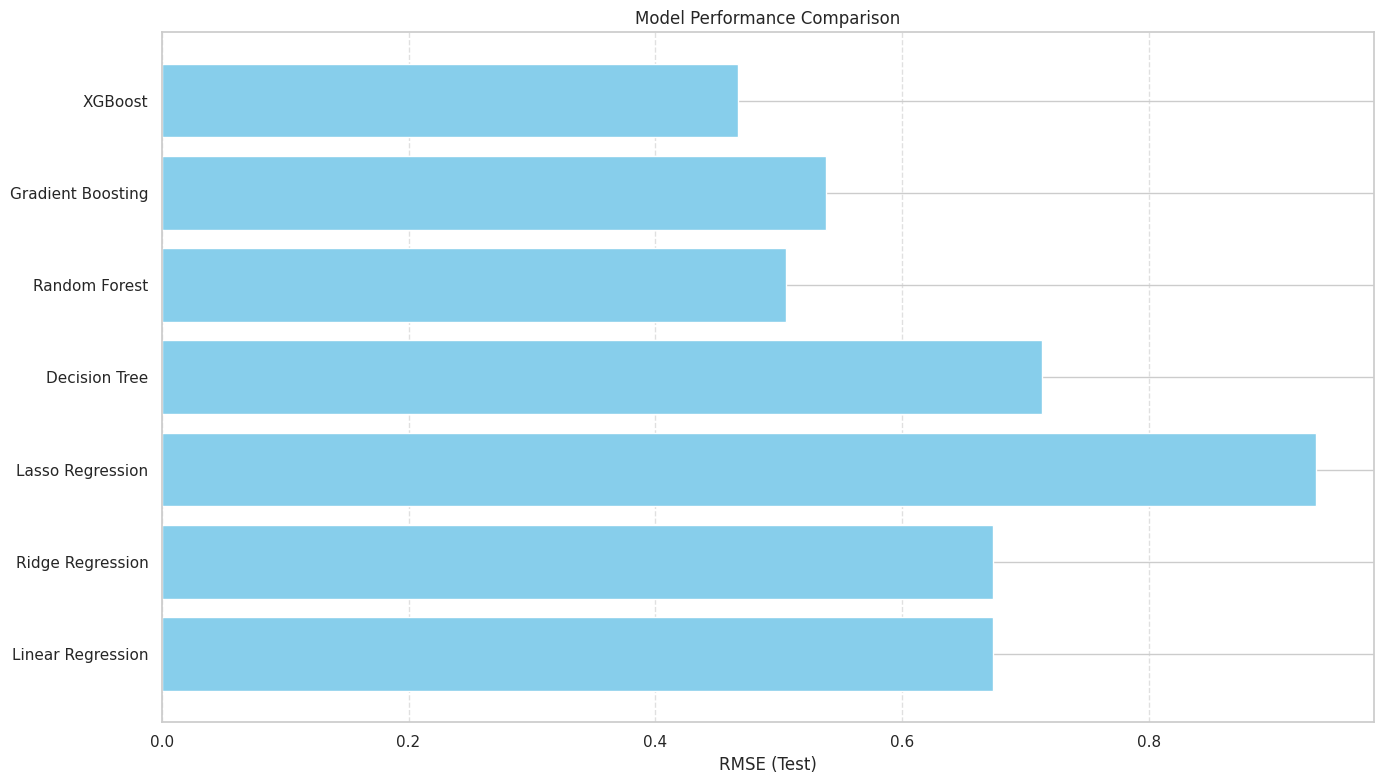

In [36]:
# Visualize baseline models performance
plt.figure(figsize=(14, 8))
plt.barh(results_df['Model'], results_df['RMSE (Test)'], color='skyblue')
plt.xlabel('RMSE (Test)')
plt.title('Model Performance Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define hyperparameter grids for Random Forest
# Use RandomizedSearchCV to efficiently search the space with cross-validation

# Train the tuned Random Forest model
# Extract the best parameters found

# Define hyperparameter grid for XGBoost
# Use RandomizedSearchCV to efficiently search the space with cross-validation

# Train the tuned XGBoost model
# Extract the best parameters found

# Evaluate the tuned models using the same metrics as before
# Compare performance to see if tuning improved results

print("\n3. Performing hyperparameter tuning...")

# Tune Random Forest
print("Tuning Random Forest model...")
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_train, y_train)
print(f"Best Random Forest parameters: {rf_random_search.best_params_}")

# Tune XGBoost
print("Tuning XGBoost model...")
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_random_search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=xgb_param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

xgb_random_search.fit(X_train, y_train)
print(f"Best XGBoost parameters: {xgb_random_search.best_params_}")

# 4. Evaluate the tuned models
print("\n4. Evaluating tuned models...")
tuned_models = {
    'Tuned Random Forest': rf_random_search.best_estimator_,
    'Tuned XGBoost': xgb_random_search.best_estimator_
}


3. Performing hyperparameter tuning...
Tuning Random Forest model...
Best Random Forest parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Tuning XGBoost model...
Best XGBoost parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.9}

4. Evaluating tuned models...


In [56]:
tuned_results = []

for model_name, model in tuned_models.items():
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    tuned_results.append({
        'Model': model_name,
        'MSE (Train)': metrics['mse_train'],
        'MSE (Test)': metrics['mse_test'],
        'RMSE (Train)': metrics['rmse_train'],
        'RMSE (Test)': metrics['rmse_test'],
        'MAE (Train)': metrics['mae_train'],
        'MAE (Test)': metrics['mae_test'],
        'R² (Train)': metrics['r2_train'],
        'R² (Test)': metrics['r2_test'],
        'Adj. R² (Train)': metrics['adj_r2_train'],
        'Adj. R² (Test)': metrics['adj_r2_test'],
        'Training Time (s)': metrics['training_time']
    })

    print(f"{model_name} - RMSE: {metrics['rmse_test']:.4f}, MAE: {metrics['mae_test']:.4f}, MSE: {metrics['mse_test']:.4f}, R²: {metrics['r2_test']:.4f}, Adj. R²: {metrics['adj_r2_test']:.4f}")

# Create tuned results DataFrame and save
tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df.to_csv('tuned_models_results.csv', index=False)

Tuned Random Forest - RMSE: 0.5042, MAE: 0.3277, MSE: 0.2542, R²: 0.8060, Adj. R²: 0.8055
Tuned XGBoost - RMSE: 0.4549, MAE: 0.2989, MSE: 0.2069, R²: 0.8421, Adj. R²: 0.8417


In [59]:
# 5. Select the best model and save it
print("\n5. Selecting the best model...")
all_results = pd.concat([results_df, tuned_results_df])

# Find the row with the minimum RMSE and reset the index to avoid ambiguity
best_model_row = all_results.loc[all_results['RMSE (Test)'].idxmin()]
best_model_name = best_model_row['Model']

# If best_model_name is still a Series, take the first value
if isinstance(best_model_name, pd.Series):
    best_model_name = best_model_name.iloc[1]  # Take the first model name if multiple

print(f"The best model is: {best_model_name}")

# Check which model is best and select it
if best_model_name == 'Tuned Random Forest':
    best_model = rf_random_search.best_estimator_
elif best_model_name == 'Tuned XGBoost':
    best_model = xgb_random_search.best_estimator_
else:
    best_model = baseline_models[best_model_name]


5. Selecting the best model...
The best model is: Tuned XGBoost


In [71]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print(f"Best model saved as best_model.pkl")

Best model saved as best_model.pkl


In [61]:
feature_importances = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

print(feature_importances)

                Feature  Importance
0                MedInc    0.329375
8   ROOMS_PER_HOUSEHOLD    0.130411
5              AveOccup    0.107208
6              Latitude    0.106892
7             Longitude    0.105608
9         BEDROOM_RATIO    0.101588
1              HouseAge    0.044371
2              AveRooms    0.026510
10   POPULATION_DENSITY    0.019129
3             AveBedrms    0.015163
4            Population    0.013745


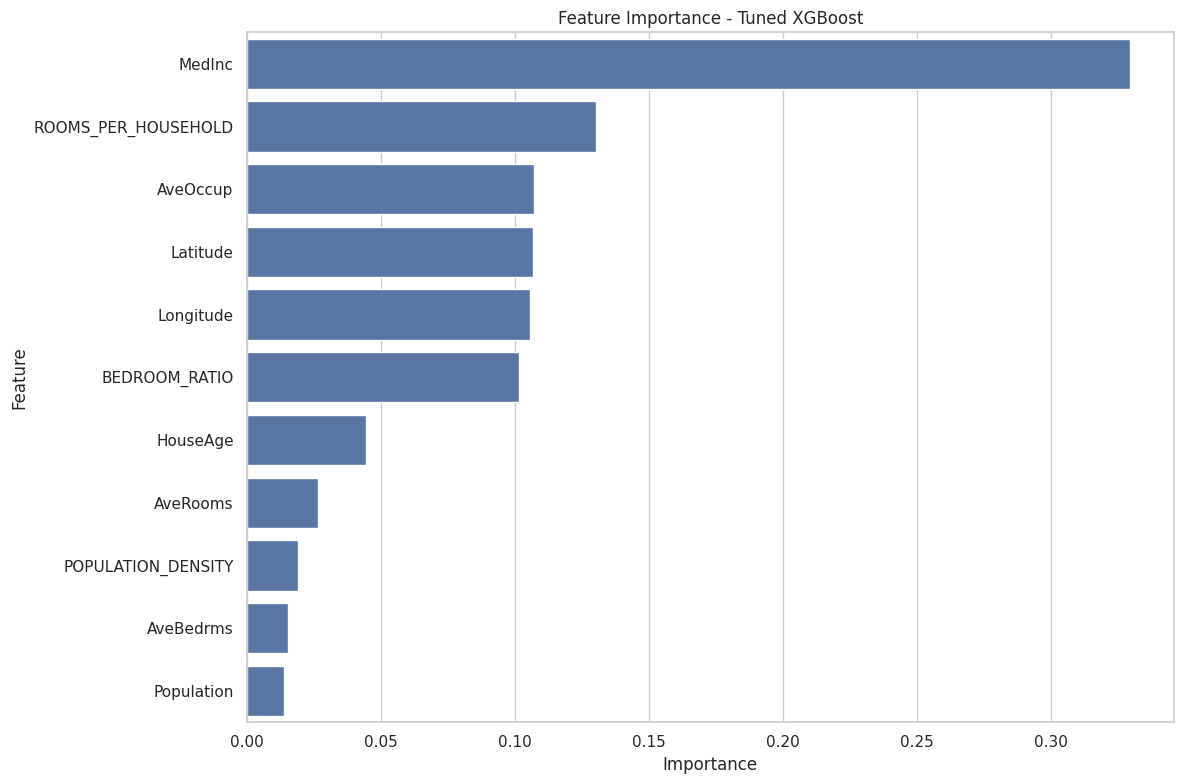

In [66]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title(f'Feature Importance - {best_model_name}')
plt.tight_layout()
plt.show()

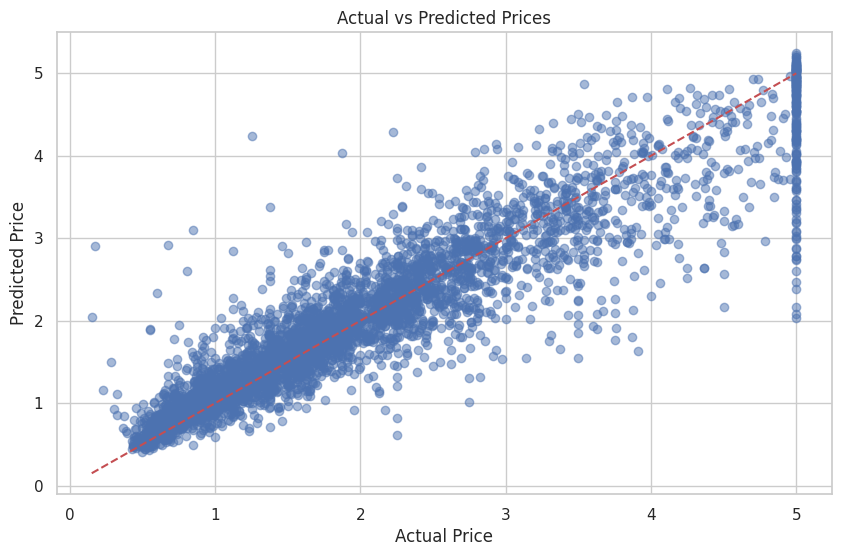

In [68]:
# Actual vs Predicted Plot

y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

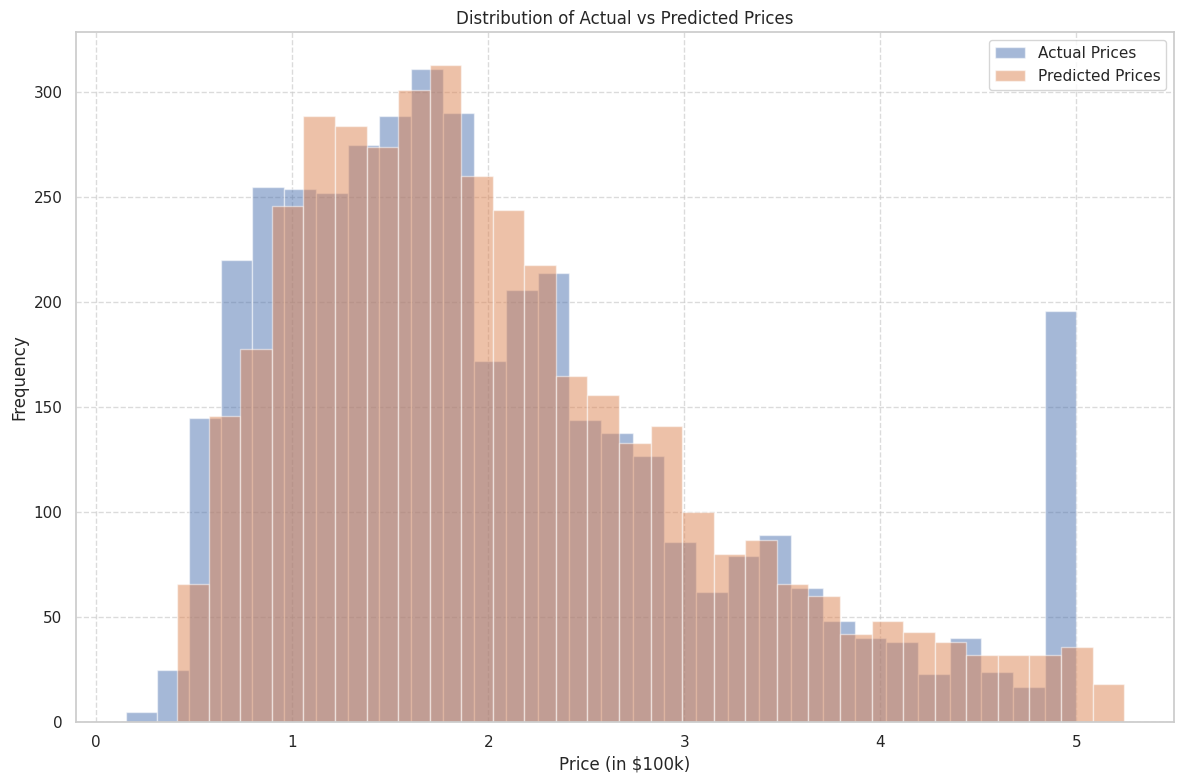

In [70]:
plt.figure(figsize=(12, 8))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Prices')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Prices')
plt.xlabel('Price (in $100k)')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Prices')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [69]:
print("\nModel training and evaluation complete. Results and visualizations saved.")
print(f"\nBest model summary ({best_model_name}):")
print(f"MSE: {all_results.loc[all_results['Model'] == best_model_name, 'MSE (Test)'].values[0]:.4f}")
print(f"RMSE: {all_results.loc[all_results['Model'] == best_model_name, 'RMSE (Test)'].values[0]:.4f}")
print(f"MAE: {all_results.loc[all_results['Model'] == best_model_name, 'MAE (Test)'].values[0]:.4f}")
print(f"R²: {all_results.loc[all_results['Model'] == best_model_name, 'R² (Test)'].values[0]:.4f}")
print(f"Adjusted R²: {all_results.loc[all_results['Model'] == best_model_name, 'Adj. R² (Test)'].values[0]:.4f}")


Model training and evaluation complete. Results and visualizations saved.

Best model summary (Tuned XGBoost):
MSE: 0.2069
RMSE: 0.4549
MAE: 0.2989
R²: 0.8421
Adjusted R²: 0.8417
